Script to plot precipitation and CRE profiles. Makes Figures 2, 9, 12

In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

## First compare control simulation and ERA-Interim/CERES 

In [2]:
#Load simulation data
tD_precip = np.load( "data/control_Prec.dat" )
tD_cloud = np.load( "data/control_USFC.dat" )
tD_wap = np.load( "data/control_W500.dat" )

#For converting w500 to \omega_500
tD_rho = np.load( "data/3D_channel_300K_rho.dat" )
tD_press = np.load( "data/3D_channel_300K_press.dat" )
#Find 500hPa level
for i in range( len( tD_press ) ):
    if tD_press[i] < 500.:
        lev = i - 1
        break

In [3]:
#Average over 64 grid points to smooth
l1 = len( tD_precip )
bin_precip = np.zeros( l1 / 64 )
bin_cloud = np.zeros( l1 / 64 )
bin_wap = np.zeros( l1 / 64 )
for i in range( l1 / 64 ):
    bin_precip[i] = np.mean( tD_precip[i * 64:(i + 1) * 64 ] )
    bin_cloud[i] = np.mean( tD_cloud[i * 64:(i + 1) * 64 ] )
    bin_wap[i] = np.mean( tD_wap[i * 64:(i + 1) * 64 ] )

x = np.linspace( 0., float(l1) * 3000., l1 / 64 )

In [4]:
#Now do CRE
lwnt = np.load( "data/control_LWNT.dat" )
lwntc = np.load( "data/control_LWNTC.dat" )
swnt = -np.load( "data/control_SWNT.dat" )
swntc = -np.load( "data/control_SWNTC.dat" )

lw_CF = lwnt - lwntc
sw_CF = swnt - swntc
net_CF = lw_CF + sw_CF

l1 = len( lw_CF )
bin_lw_CF = np.zeros( l1 / 64 )
bin_sw_CF = np.zeros( l1 / 64 )
bin_net_CF = np.zeros( l1 / 64 )
for i in range( l1 / 64 ):
    bin_lw_CF[i] = np.mean( lw_CF[i * 64:(i + 1) * 64 ] )
    bin_sw_CF[i] = np.mean( sw_CF[i * 64:(i + 1) * 64 ] )
    bin_net_CF[i] = np.mean( net_CF[i * 64:(i + 1) * 64 ] )


In [5]:
#Load ERA Interim data
ERA_precip = np.mean(np.load( "ERA/ERA_I_pr.dat" ), axis = 0)
ERA_precip_2006 = np.load( "ERA/ERA_I_pr.dat" )[26 * 12:27 * 12] #Just for 2006, an ENSO-neutral year
ERA_cloud = np.mean(np.load( "ERA/ERA_I_us.dat" ), axis = 0)
ERA_cloud_2006 = np.load( "ERA/ERA_I_us.dat" )[26 * 12:27 * 12]
ERA_wap = np.mean(np.load( "ERA/ERA_I_w500.dat" ), axis = 0)
ERA_wap_2006 = np.load( "ERA/ERA_I_w500.dat" )[25 * 12:26 * 12]

l1, l2 = np.shape( ERA_precip_2006 )
lon = np.linspace( 140., 270., l2 )
lon2 = np.linspace( 140., 270., len( ERA_wap ) ) #Different grid 

In [6]:
#Load CERES data
CERES_LW = np.load( "CERES/CERES_mean_rlut.dat" )
CERES_SW = np.load( "CERES/CERES_mean_rsut.dat" )
CERES_LW_CS = np.load( "CERES/CERES_mean_rlutcs.dat" )
CERES_SW_CS = np.load( "CERES/CERES_mean_rsutcs.dat" )
CERES_LW_CRE = CERES_LW - CERES_LW_CS
CERES_SW_CRE = CERES_SW - CERES_SW_CS

CERES_net_CRE = CERES_LW_CRE + CERES_SW_CRE

CERES2006_LW = np.load( "CERES/CERES_2006_rlut.dat" )
CERES2006_SW = np.load( "CERES/CERES_2006_rsut.dat" )
CERES2006_LW_CS = np.load( "CERES/CERES_2006_rlutcs.dat" )
CERES2006_SW_CS = np.load( "CERES/CERES_2006_rsutcs.dat" )
CERES2006_LW_CRE = CERES2006_LW - CERES2006_LW_CS
CERES2006_SW_CRE = CERES2006_SW - CERES2006_SW_CS

CERES2006_net_CRE = CERES2006_LW_CRE + CERES2006_SW_CRE

l3 = len( CERES_LW_CRE )
lon3 = np.linspace( 120., 270., l3 )


In [7]:
def make_axis( a ):

    a.tick_params( axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = 'out')                  
    a.tick_params( axis = 'y', which = 'both', bottom="off", top="off",  labelbottom="off", left="on", right="off", labelleft="on", direction = 'out')                                                                                        

    a.tick_params(length = 5, which = 'both')
    a.spines["top"].set_visible(False)    

    plt.xticks(fontsize = 14 )
    plt.yticks(fontsize = 14 )
    
    majorLocator = MultipleLocator(30)
    minorLocator = MultipleLocator(10)
    a.xaxis.set_major_locator(majorLocator)
    a.xaxis.set_minor_locator(minorLocator)
    
    plt.xlim([140., 270.])
    plt.xlabel( "Longitude", fontsize = 14 )

    return 0

def make_axis2( a2 ):

    a2.set_xlabel( "x [10$^3$ km]", fontsize = 14, color = cs[2]  )

    majorLocator = MultipleLocator(3)
    minorLocator = MultipleLocator(1)
    a2.xaxis.set_major_locator(majorLocator)
    a2.xaxis.set_minor_locator(minorLocator)

    a2.set_xticks([3., 6., 9., 12.])

    plt.xticks(fontsize = 14, color = cs[2] )

    plt.xlim([0., 12.5])

    ax2.tick_params( axis = 'x', which = 'both', bottom="off", top = "on", labelbottom = "off", direction = 'out')                                                                                                         
    ax2.tick_params(length = 5, which = 'both', color =  cs[2], width = 2.)
    ax2.spines["top"].set_linewidth(2.) 

    ax2.spines["right"].set_visible(False) 


    return 0

/home/nick/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


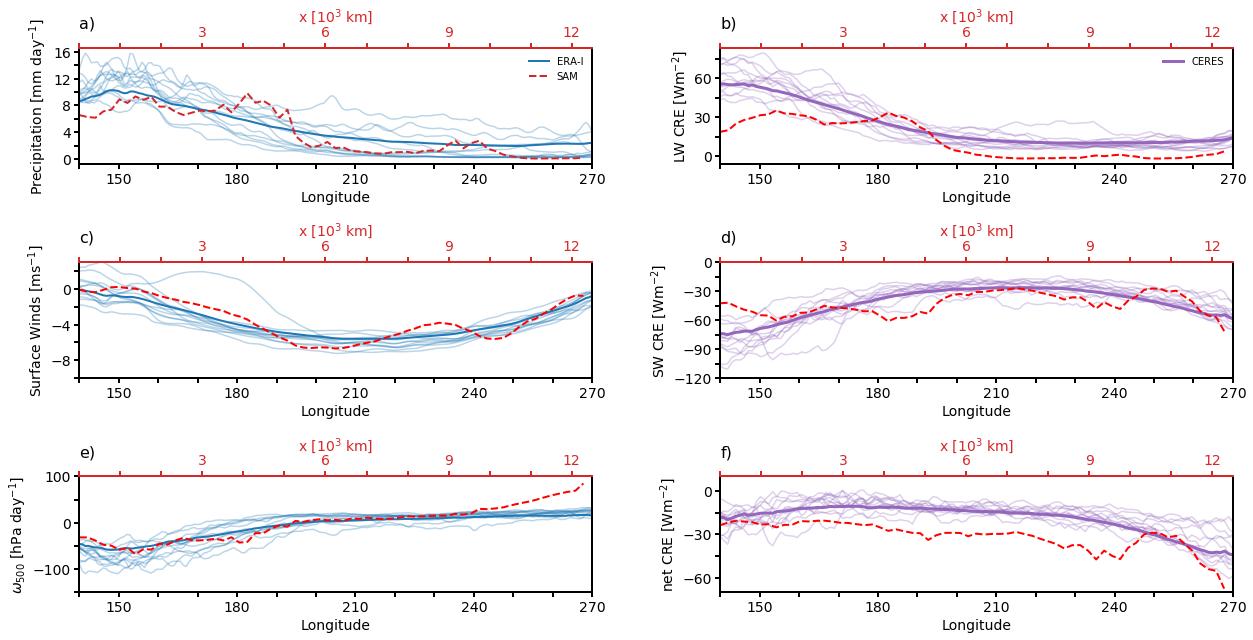

In [8]:
fig = plt.figure( figsize = (18, 9) )
plt.subplots_adjust(left = 0.06, right = 0.95, bottom = 0.09, top = 0.93, hspace = 0.85, wspace = 0.25)

ax = plt.subplot(3, 2, 1 )
plt.title( "a)", fontsize = 16, loc = "left", y = 1.12 )

cs = [(31 / 255., 119 / 255., 180 / 255.), (44. / 255., 160 / 255., 44 / 255.), (214 / 255., 39 / 255., 40 / 255.), (255 / 255., 127 / 255., 14 / 255.), (148 / 255., 103 / 255., 189 / 255.) ]

ln = plt.plot( lon, ERA_precip * 86400., color = cs[0], linewidth = 2. )
for i in range( l1 ):
    plt.plot( lon, ERA_precip_2006[i] * 86400., color = cs[0], alpha = 0.3 )

plt.ylabel( "Precipitation [mm day$^{-1}$]", fontsize = 14 )

majorLocator = MultipleLocator(4)
minorLocator = MultipleLocator(2)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

make_axis( ax )

ax2 = ax.twiny()
ax2.spines['top'].set_edgecolor(cs[2])
ln2 = ax2.plot( x / 1000. / 1000., bin_precip , '--', color = cs[2], linewidth = 2. )

plt.yticks(fontsize = 14, color = cs[2] )
make_axis2( ax2 )

lns = ln + ln2
plt.legend( lns, ["ERA-I", "SAM"], frameon = False)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(which='minor', width=4)
ax.tick_params(which='major', length= 5)
ax.tick_params(which='both', width=2)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
ax2.tick_params(which='minor', width=4)
ax2.tick_params(which='major', length= 5)
ax2.tick_params(which='both', width=2)
   

ax = plt.subplot(3, 2, 3 )
plt.title( "c)", fontsize = 16, loc = "left", y = 1.12 )

plt.plot( lon, ERA_cloud, color = cs[0], linewidth = 2. )
for i in range( l1 ):
    plt.plot( lon, ERA_cloud_2006[i], color = cs[0], alpha = 0.3 )

plt.ylabel( "Surface Winds [ms$^{-1}$]", fontsize = 14 )

majorLocator = MultipleLocator(4)
minorLocator = MultipleLocator(2)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

plt.ylim([-10., 3.])
make_axis( ax )

ax2 = ax.twiny()
ax2.spines['top'].set_edgecolor(color = cs[2])
ln2 = ax2.plot( x / 1000. / 1000., bin_cloud , 'r--', linewidth = 2. )

plt.yticks(fontsize = 14, color =  cs[2] )

make_axis2( ax2 )


for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(which='minor', width=4)
ax.tick_params(which='major', length= 5)
ax.tick_params(which='both', width=2)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
ax2.tick_params(which='minor', width=4)
ax2.tick_params(which='major', length= 5)
ax2.tick_params(which='both', width=2)

ax = plt.subplot(3, 2, 5 )
plt.title( "e)", fontsize = 16, loc = "left", y = 1.12 )

plt.plot( lon2, ERA_wap * 60. * 60. * 24. / 100., color = cs[0], linewidth = 2. )
l1 = len(ERA_wap_2006[:, 0])
for i in range( l1 ):
    plt.plot( lon2, ERA_wap_2006[i] * 60. * 60. * 24. / 100., color = cs[0], alpha = 0.3 )

plt.xlabel( "Longitude", fontsize = 146 )
plt.ylabel( "$\omega_{500}$ [hPa day$^{-1}$]", fontsize = 14 )

majorLocator = MultipleLocator(100)
minorLocator = MultipleLocator(50)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

plt.ylim([-150., 100.])
make_axis( ax )

ax2 = ax.twiny()
ax2.spines['top'].set_edgecolor(color = cs[2])
ln2 = ax2.plot( x / 1000. / 1000., bin_wap  * 60. * 60. * 24. / 100. * tD_rho[lev] * -9.8, 'r--', linewidth = 2. )

ax2.set_xlabel( "x [10$^3$ km]", fontsize = 14, color =  cs[2] )

plt.yticks(fontsize = 14, color =  cs[2] )

make_axis2( ax2 )

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(which='minor', width=4)
ax.tick_params(which='major', length= 5)
ax.tick_params(which='both', width=2)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
ax2.tick_params(which='minor', width=4)
ax2.tick_params(which='major', length= 5)
ax2.tick_params(which='both', width=2)


l3 = len( CERES_LW_CRE )
lon3 = np.linspace( 120., 270., l3 )

ax = plt.subplot(3, 2, 2 )
plt.title( "b)", fontsize = 16, loc = "left", y = 1.12 )

ln3 = plt.plot( lon3, -CERES_LW_CRE, color = cs[4], linewidth = 3. )
plt.legend(["CERES"], frameon = False)
for i in range( l1 ):
    plt.plot( lon3, -CERES2006_LW_CRE[i], color = cs[4], alpha = 0.3 )
plt.ylabel( "LW CRE [Wm$^{-2}$]", fontsize = 14 )

majorLocator = MultipleLocator(30)
minorLocator = MultipleLocator(15)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

make_axis( ax )

ax2 = ax.twiny()
ax2.spines['top'].set_edgecolor(color = cs[2])
ln2 = ax2.plot( x / 1000. / 1000., -bin_lw_CF, 'r--', linewidth = 2. )

plt.yticks(fontsize = 14, color =  cs[2] )

make_axis2( ax2 )
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(which='minor', width=4)
ax.tick_params(which='major', length= 5)
ax.tick_params(which='both', width=2)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
ax2.tick_params(which='minor', width=4)
ax2.tick_params(which='major', length= 5)
ax2.tick_params(which='both', width=2)

ax = plt.subplot(3, 2, 4 )
plt.title( "d)", fontsize = 16, loc = "left", y = 1.12 )

ln3 = plt.plot( lon3, -CERES_SW_CRE, color = cs[4], linewidth = 3. )
for i in range( l1 ):
    plt.plot( lon3, -CERES2006_SW_CRE[i], color = cs[4], alpha = 0.3 )
plt.ylabel( "SW CRE [Wm$^{-2}$]", fontsize = 14 )

majorLocator = MultipleLocator(30)
minorLocator = MultipleLocator(15)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

make_axis( ax )

ax2 = ax.twiny()
ax2.spines['top'].set_edgecolor(color = cs[2])
ln2 = ax2.plot( x / 1000. / 1000., -bin_sw_CF, 'r--', linewidth = 2. )

plt.yticks(fontsize = 14, color =  cs[2] )

make_axis2( ax2 )
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(which='minor', width=4)
ax.tick_params(which='major', length= 5)
ax.tick_params(which='both', width=2)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
ax2.tick_params(which='minor', width=4)
ax2.tick_params(which='major', length= 5)
ax2.tick_params(which='both', width=2)
   

plt.ylim([-120., 0.])

ax = plt.subplot(3, 2, 6 )
plt.title( "f)", fontsize = 16, loc = "left", y = 1.12 )

ln3 = plt.plot( lon3, -CERES_net_CRE, color = cs[4], linewidth = 3. )
for i in range( l1 ):
    plt.plot( lon3, -CERES2006_net_CRE[i], color = cs[4], alpha = 0.3 )
plt.ylabel( "net CRE [Wm$^{-2}$]", fontsize = 14 )

majorLocator = MultipleLocator(30)
minorLocator = MultipleLocator(15)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

make_axis( ax )

ax2 = ax.twiny()
ax2.spines['top'].set_edgecolor(color = cs[2])
ln2 = ax2.plot( x / 1000. / 1000., -bin_net_CF, 'r--', linewidth = 2. )

plt.yticks(fontsize = 14, color =  cs[2] )

make_axis2( ax2 )
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(which='minor', width=4)
ax.tick_params(which='major', length= 5)
ax.tick_params(which='both', width=2)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
ax2.tick_params(which='minor', width=4)
ax2.tick_params(which='major', length= 5)
ax2.tick_params(which='both', width=2)
   

plt.ylim([-70., 10.])

plt.savefig("MERRA_SAM_comp.png")
plt.savefig("MERRA_SAM_comp.pdf")

## Now plot precipitation profiles

In [9]:
direcs = ['control', 'control_-1', 'control_+1', '2K_warming', '2K_-1_warming', '2K_+1_warming'] 
d = len(direcs)

In [10]:
# These are the "Tableau 20" colors as RGB.    
cs = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(cs)):    
    r, g, b = cs[i]    
    cs[i] = (r / 255., g / 255., b / 255.) 
    
colors = ['k', cs[0], cs[6], 'k', cs[0], cs[6]]
styles = ['-', '-', '-', '--', '--', '--']

In [11]:

def make_axis( a ):

    a.tick_params( axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = 'out')                  
    a.tick_params( axis = 'y', which = 'both', bottom="off", top="off",  labelbottom="off", left="on", right="off", labelleft="on", direction = 'out')                                                                                        

    a.tick_params( which = 'both', direction = 'out' )
    a.tick_params( axis = 'both', which = 'major', length = 6 )
    a.tick_params( axis = 'both', which = 'minor', length = 4 )

    a.spines["top"].set_visible(False)    
    a.spines["right"].set_visible(False) 

    plt.xticks(fontsize = 16 )
    plt.yticks(fontsize = 16 )

    a.set_xlabel( "x [10$^3$ km]", fontsize = 18 )
    plt.xlim([0., 12.])

    majorLocator = MultipleLocator(3)
    minorLocator = MultipleLocator(1)
    a.xaxis.set_major_locator(majorLocator)
    a.xaxis.set_minor_locator(minorLocator)

    return 0

0.578125
0.640625
0.578125
0.515625
0.65625
0.625


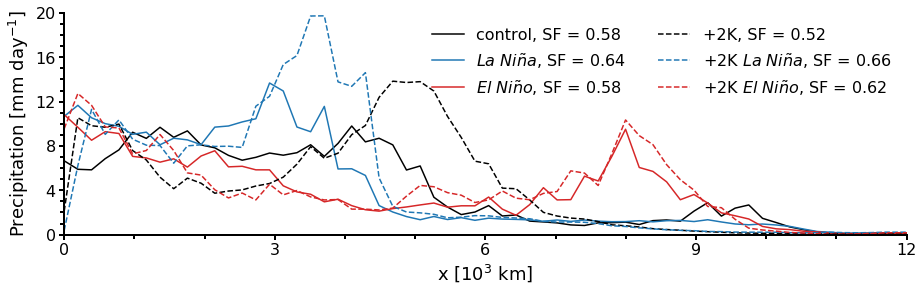

In [12]:
fig = plt.figure( figsize = (13, 4) )
plt.subplots_adjust(left = 0.08, right = 0.98, bottom = 0.2, top = 0.97, wspace = 0.3)

ax = plt.subplot(1, 1, 1)
for i in range( d ):

    data = np.load( "data/" + direcs[i] + "_Prec.dat")
    wdata = np.load( "data/" + direcs[i] + "_averaged_w.dat" ) #\omega averaged over 700-400hPa

    l1 = len( data )
    x = np.linspace( 0., float(l1) * 3000., l1 / 64 )
    ndata = np.zeros( l1 / 64 )
    for k in range( l1 / 64 ):
        ndata[k] = np.mean( data[k * 64:(k + 1) * 64 ] )
            
    #Calculate subsidence fraction:
    nwdata = np.zeros( l1 / 64 )
    for k in range( l1 / 64 ):
        nwdata[k] = np.mean( wdata[k * 64:(k + 1) * 64 ] )

    nwdata = np.ma.masked_where( nwdata < 0., nwdata )
    mask_1 = np.ma.getmask( nwdata )
    for k in range( l1 / 64 ):
        if x[k] / 1000. / 1000. < 0.:
            mask_1[k] = 0.
        sf = sum( mask_1 ) / float( len( nwdata ) )
    print sf

    plt.plot( x / 1000. / 1000., ndata, color = colors[i], linestyle = styles[i], linewidth = 1.5 )

    make_axis( ax )

    plt.ylim([0., 20.] )
    plt.ylabel( "Precipitation [mm day$^{-1}$]", fontsize = 18)

    plt.legend(["control, SF = 0.58", "$La$ $Ni\~na$, SF = 0.64", "$El$ $Ni\~no$, SF = 0.58", "+2K, SF = 0.52", "+2K $La$ $Ni\~na$, SF = 0.66", "+2K $El$ $Ni\~no$, SF = 0.62"], frameon = False, loc = "upper right", fontsize = 16, ncol = 2 )

    majorLocator = MultipleLocator( 4. )
    minorLocator = MultipleLocator( 1. )

    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(which='minor', width=4)
    ax.tick_params(which='major', length= 5)
    ax.tick_params(which='both', width=2)
    

plt.savefig("precip_profile.png" )
plt.savefig("precip_profile.pdf" )


## CRE Profiles

In [13]:
#Reload data to make it easier to automate plotting
direcs = ['control', 'control_-1', 'control_+1', '2K_warming', '2K_-1_warming', '2K_+1_warming'] 
d = len(direcs)

var = ['SWNT', 'SWNTC', 'LWNT', 'LWNTC']
v = len(var)

data = np.zeros( ( (v + 5, d, 4096 )))

for j in range( v ):
    for i in range( d ):
        data[j, i] = np.load("data/" + direcs[i] + "_" + var[j] + ".dat")


In [14]:
data[v] = data[0] - data[2] #net OLR
data[v + 1] = data[0] - data[1] #SW CRE
data[v + 2] = data[2] - data[3] #LW CRE
data[v + 3] = data[0] - data[2] - data[1] + data[3] #net CRE
data[v + 4] = data[1] - data[3] #net clearsky

In [15]:
x = np.linspace( 0., float(4096) * 3000., 4096 / 64 )
ndata = np.zeros( ( ( v + 5, d, 4096 / 64)))

#Average over 64 grid points:
for i in range( v + 5):
    for j in range( d ):
        for k in range( 4096 / 64 ):
            ndata[i, j, k] = np.mean( data[i, j, k * 64:(k + 1) * 64 ] )

In [16]:
def make_axis( a ):

    a.tick_params( axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = 'out')                  
    a.tick_params( axis = 'y', which = 'both', bottom="off", top="off",  labelbottom="off", left="on", right="off", labelleft="on", direction = 'out')                                                                                        

    a.tick_params( which = 'both', direction = 'out' )
    a.tick_params( axis = 'both', which = 'major', length = 6 )
    a.tick_params( axis = 'both', which = 'minor', length = 3 )

    a.spines["top"].set_visible(False)    
    a.spines["right"].set_visible(False) 

    plt.xticks(fontsize = 14 )
    plt.yticks(fontsize = 14 )

    a.set_xlabel( "x [10$^3$ km]", fontsize = 16 )
    plt.xlim([0., 12.])

    majorLocator = MultipleLocator(3)
    minorLocator = MultipleLocator(1)
    a.xaxis.set_major_locator(majorLocator)
    a.xaxis.set_minor_locator(minorLocator)

    return 0
    
colors = ['k', cs[0], cs[6], 'k', cs[0], cs[6]]
styles = ['-', '-', '-', '--', '--', '--']

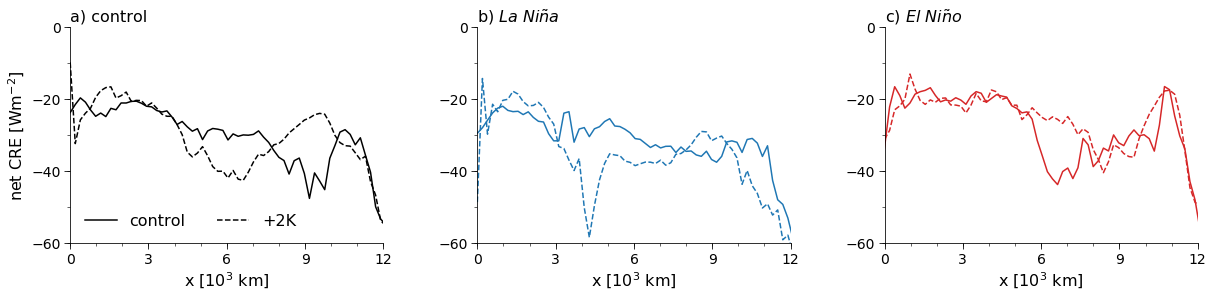

In [17]:
fig = plt.figure( figsize = (18, 4) )
plt.subplots_adjust(left = 0.08, right = 0.95, bottom = 0.15, top = 0.9, wspace = 0.3, hspace = 0.6)


titles = ["a) control", "b) $La$ $Ni\~na$", "c) $El$ $Ni\~no$"]
for j in range( 3 ):
    ax = plt.subplot( 1, 3, 1 + j)
    plt.title( titles[j], fontsize = 16, loc = "left")

    for i in j, j + 3:#range( 6):
        plt.plot( x / 1000. / 1000., ndata[v + 3, i], color = colors[i], linestyle = styles[i], linewidth = 1.5 )

    make_axis( ax )
    majorLocator = MultipleLocator( 20 )
    minorLocator = MultipleLocator( 10. )

    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    plt.ylim([-60., 0.]) 

    if j == 0:
        plt.ylabel( "net CRE [Wm$^{-2}$]", fontsize = 16)
        plt.legend(["control", "+2K"], frameon = False, loc = "lower left", ncol = 3, fontsize = 16)

plt.savefig("CRE_comparison_sims.png")
plt.savefig("CRE_comparison_sims.pdf")

In [18]:
#Print TOA fluxes
print np.mean(ndata[v, :, 1:], axis = 1) 
print np.mean(ndata[v + 3, :, 1:], axis = 1)

[56.60769958 53.52526048 60.68356002 53.66607717 46.55227279 59.69915038]
[-31.15279456 -32.13117627 -28.39583954 -31.14493455 -36.06810955
 -26.39580105]


In [19]:
#Print feedbacks
for i in range( 3 ):
    print i, np.shape( ndata), v, v + 4
    feedbacks = (np.mean(ndata[v, i + 3, 1:] ) - np.mean(ndata[v, i, 1:] ) ) / 2.
    crf = (np.mean(ndata[v + 3, i + 3, 1:] ) - np.mean(ndata[v + 3, i, 1:] ) ) / 2.
    cs = (np.mean(ndata[v + 4, i + 3, 1:] ) - np.mean(ndata[v + 4, i, 1:] ) ) / 2.
    print feedbacks
    print crf
    print cs

0 (9, 6, 64) 4 8
-1.4708112058457345
0.003930003653811909
-1.4747412094995553
1 (9, 6, 64) 4 8
-3.4864938409177064
-1.9684666381374214
-1.5180272027802815
2 (9, 6, 64) 4 8
-0.4922048186215129
1.000019244608426
-1.4922240632299406
